In [1]:
import numpy as np
import tensorflow as tf

Load the dataset

In [2]:
train_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset/train/*/*')
val_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset/val/*/*')
test_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset/test/*/*')

print(f"Number of training files: {len(train_files)}")
print(f"Number of validation files: {len(val_files)}")
print(f"Number of testing files: {len(test_files)}")

Number of training files: 7560
Number of validation files: 1282
Number of testing files: 632


## Find the structure of the dataset


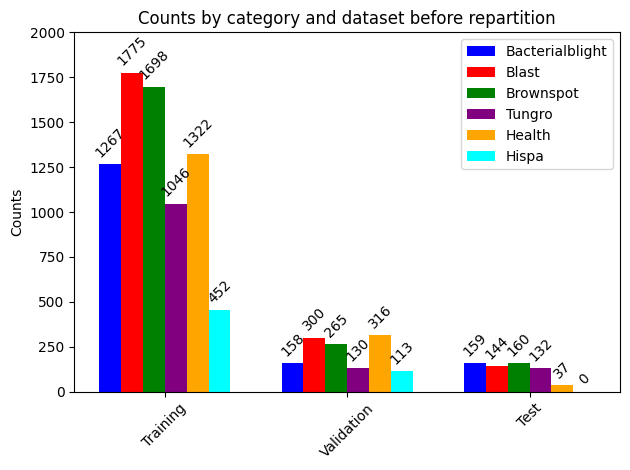

In [3]:
import matplotlib.pyplot as plt

def count_and_visualize(filenames, category_labels):
    def count(filenames):
        # Count the number of the images
        count_bacterialblight = len([filename for filename in filenames if "Bacterialblight" in filename])
        count_blast = len([filename for filename in filenames if "Blast" in filename])
        count_brownspot = len([filename for filename in filenames if "Brownspot" in filename])
        count_tungro = len([filename for filename in filenames if "Tungro" in filename])
        count_health = len([filename for filename in filenames if "Health" in filename])
        count_hispa = len([filename for filename in filenames if "Hispa" in filename])
        
        return count_bacterialblight, count_blast, count_brownspot, count_tungro, count_health, count_hispa

    # Calculate the number of each category in each dataset
    bacterialblight_counts = []
    blast_counts = []
    brownspot_counts = []
    tungro_counts = []
    health_counts = []
    hispa_counts = [] 
    
    for files in filenames:
        bacterialblight, blast, brownspot, tungro, health, hispa = count(files)
        bacterialblight_counts.append(bacterialblight)
        blast_counts.append(blast)
        brownspot_counts.append(brownspot)
        tungro_counts.append(tungro)
        health_counts.append(health)
        hispa_counts.append(hispa)

    # Visualize the number of each category in each folder before repartition
    categories = category_labels
    x = list(range(len(categories)))
    width = 0.12  # Adjusted for six categories

    fig, ax = plt.subplots()
    rects1 = ax.bar([xi - 2.5 * width for xi in x], bacterialblight_counts, width, label='Bacterialblight', color='blue')
    rects2 = ax.bar([xi - 1.5 * width for xi in x], blast_counts, width, label='Blast', color='red')
    rects3 = ax.bar([xi - 0.5 * width for xi in x], brownspot_counts, width, label='Brownspot', color='green')
    rects4 = ax.bar([xi + 0.5 * width for xi in x], tungro_counts, width, label='Tungro', color='purple')
    rects5 = ax.bar([xi + 1.5 * width for xi in x], health_counts, width, label='Health', color='orange')
    rects6 = ax.bar([xi + 2.5 * width for xi in x], hispa_counts, width, label='Hispa', color='cyan')

    # setting some details about the image
    ax.set_ylim(0, 2000)
    ax.set_ylabel('Counts')
    ax.set_title('Counts by category and dataset before repartition')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3, rotation=45)
    ax.bar_label(rects2, padding=3, rotation=45)
    ax.bar_label(rects3, padding=3, rotation=45)
    ax.bar_label(rects4, padding=3, rotation=45)
    ax.bar_label(rects5, padding=3, rotation=45)
    ax.bar_label(rects6, padding=3, rotation=45) 

    fig.tight_layout()

    plt.show()

file_lists = [train_files, val_files, test_files]
category_labels = ['Training', 'Validation', 'Test']
count_and_visualize(file_lists, category_labels)

## Find some duplicates in the dataset

In [4]:
import os
import hashlib

def calculate_file_hash(file_path):
    # Calculate the SHA-256 hash of a file.
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()

def find_and_remove_duplicates(base_dir):
    # Find and remove duplicate files in the specified directory.
    hash_map = {}
    duplicates = []

    for root, _, files in os.walk(base_dir):
        for file in files:
            file_path = os.path.join(root, file)
            file_hash = calculate_file_hash(file_path)

            if file_hash in hash_map:
                duplicates.append((file_path, hash_map[file_hash]))
                os.remove(file_path)  # Remove the duplicate file
            else:
                hash_map[file_hash] = file_path

    return duplicates

# Specify the directory to check for duplicates
base_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset'
duplicates = find_and_remove_duplicates(base_dir)

if duplicates:
    print(f"Duplicate files found and removed: {len(duplicates)} pairs")
    for dup in duplicates:
        print(f"Removed duplicate: {dup[0]}")
else:
    print("No duplicate files found.")

Duplicate files found and removed: 1141 pairs
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Bacterialblight\BACTERAILBLIGHT3_090.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Bacterialblight\BACTERAILBLIGHT5_258.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Bacterialblight\BACTERIALBLIGHT2_186.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Bacterialblight\BACTERIALBLIGHT2_252.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Bacterialblight\BACTERIALBLIGHT2_263.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Blast\BLAST5_110.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\test\Brownspot\BROWNSPOT4_037.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset\

## Data argumentation

In [5]:
import os
from sklearn.model_selection import train_test_split
import shutil

# define the original adress of the dataset and the location of the new dataset
original_base_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/dataset'
new_base_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/new_dataset'
splits = ['train', 'val', 'test']
classes = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro', 'Health', 'Hispa']

# create the new dataset base
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(new_base_dir, split, cls), exist_ok=True)

# define the data argumentation function
def augment_image(image_path):
    # Read the image from the file path
    image = tf.io.read_file(image_path)
    # Decode the image as a JPEG with 3 color channels
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Apply a series of random augmentations
    # Randomly flip the image left to right
    image = tf.image.random_flip_left_right(image)
    # Randomly flip the image up to down
    image = tf.image.random_flip_up_down(image)
    # Randomly adjust the brightness of the image
    image = tf.image.random_brightness(image, max_delta=0.2)
    # Randomly adjust the contrast of the image
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    # Randomly adjust the saturation of the image
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    # Randomly rotate the image
    image = tf.image.rot90(image, k=np.random.randint(4))
    # Randomly crop the image to a slightly smaller size
    image = tf.image.random_crop(image, size=[tf.shape(image)[0] - 10, tf.shape(image)[1] - 10, 3])
    return image

# re-split the data and do the data argumentation
for cls in classes:
    # get all the file paths
    train_files = os.listdir(os.path.join(original_base_dir, 'train', cls))
    val_files = os.listdir(os.path.join(original_base_dir, 'val', cls))
    test_files = os.listdir(os.path.join(original_base_dir, 'test', cls))
    
    # combine all the files
    all_files = train_files + val_files + test_files
    all_file_paths = [os.path.join(original_base_dir, 'train', cls, f) for f in train_files] + \
                     [os.path.join(original_base_dir, 'val', cls, f) for f in val_files] + \
                     [os.path.join(original_base_dir, 'test', cls, f) for f in test_files]
    
    augmented_file_paths = all_file_paths.copy()
    while len(augmented_file_paths) < 2000:
        for file in all_file_paths:
            augmented_image = augment_image(file)
            # generate a unique file name for each augmented image
            unique_suffix = len(augmented_file_paths)  # use the current length as the unique suffix
            new_file_path = os.path.join(new_base_dir, 'temp', cls, f"aug_{unique_suffix}_{os.path.basename(file)}")
            new_file_path = os.path.normpath(new_file_path)  # normalize the path
            # write the file to the new path
            tf.io.write_file(new_file_path, tf.image.encode_jpeg(augmented_image))
            augmented_file_paths.append(new_file_path)
            if len(augmented_file_paths) >= 2000:
                break

    # re-split the data
    train_files, temp_files = train_test_split(augmented_file_paths, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # copy the files to the new directory and apply the data argumentation
    for file in train_files:
        augmented_image = augment_image(file)
        augmented_image_path = os.path.join(new_base_dir, 'train', cls, os.path.basename(file))
        tf.io.write_file(augmented_image_path, tf.image.encode_jpeg(augmented_image))
        
    for file in val_files:
        shutil.copy(file, os.path.join(new_base_dir, 'val', cls, os.path.basename(file)))
    for file in test_files:
        shutil.copy(file, os.path.join(new_base_dir, 'test', cls, os.path.basename(file)))

    # delete the temp folder
    temp_dir = os.path.join(new_base_dir, 'temp')
    if os.path.exists(temp_dir):
        shutil.rmtree(temp_dir)

## Add some noise to the new dataset

In [6]:
def add_noise_to_image(image, noise_factor):
    # Add random noise to an image.
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=noise_factor, dtype=tf.float32)
    noisy_image = image + noise
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)  # Ensure pixel values are within [0, 1]
    return tf.cast(noisy_image * 255.0, tf.uint8)  # Convert back to uint8

def process_and_save_images_with_noise(base_dir, splits, classes, noise_factor):
    # Process images by adding noise and save them back
    for split in splits:
        for cls in classes:
            class_dir = os.path.join(base_dir, split, cls)
            for filename in os.listdir(class_dir):
                # 
                file_path = os.path.join(class_dir, filename)
                image = tf.io.read_file(file_path)
                image = tf.image.decode_jpeg(image, channels=3)
                noisy_image = add_noise_to_image(image, noise_factor)
                tf.io.write_file(file_path, tf.image.encode_jpeg(noisy_image))
            
splits = ['train', 'val', 'test']
classes = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro', 'Health']

# Process and save images with noise
process_and_save_images_with_noise(new_base_dir, splits, classes, noise_factor=0.05)

## Find some duplicates in the new dataset

In [7]:
# Check for duplicates in the new_dataset directory
duplicates_new = find_and_remove_duplicates(new_base_dir)

if duplicates_new:
    print(f"Duplicate images found in new_dataset: {len(duplicates_new)} pairs")
    for dup in duplicates_new:
        print(f"Duplicate: {dup[0]} and {dup[1]}")
else:
    print("No duplicate images found in new_dataset.")

No duplicate images found in new_dataset.
